<a href="https://colab.research.google.com/github/kb22/Tensorflow-Course/blob/master/Classification_of_Fashion_MNIST_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Fashion MNIST using ANN

In this notebook, I'll use an Artificial Neural Network to train on the Fashion MNIST dataset and then classify amongst 10 different clothing items including shirt, sandel etc.

## Background

The Fashion MNIST dataset includes many images belonging to 10 different classes of clothing. These classes are:
- T-shirt/top
- Trouser
- Pullover
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

The dataset allows us to use deep learning models to train on the images and then use it to classify new set of images from these classes. Each image is of the size 28x28 pixels. Each pixel value is represented as a value from 0 to 255. 0 refers to black, 255 refers to white and the number in between refer to different shades of gray. All images are grayscale.

## Import libraries

I'll import tensorflow and other libraries. The Fashion MNIST dataset is available in `tensorflow_datatsets`.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow_datasets as tfds

tf.enable_eager_execution()

I'll also set the logging to only log Tensorflow errors.

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Data retrieval

The `tensorflow_datasets` already has the MNIST dataset. So, the best way to get the data is from here itself.
The `tfds.load()` method is used to fetch the dataset.
- **name:** It is the name of the dataset that we want to download.
- **data_dir:** It defines the directory where we want to save/read the dataset to/from.
- **as_supervised:** It returns the labels along with the features so that we can perform supervised learning.
- **with_info:** It returns information about the dataset.

The complete list of datasets is available [here](https://www.tensorflow.org/datasets/datasets).

In [0]:
dataset, info = tfds.load(name = 'fashion_mnist', data_dir = 'data', as_supervised = True, with_info = True)

Let's first take a look at the information available with this dataset.

In [4]:
print("Dataset name: {}".format(info.name))
print("Dataset version: {}".format(info.version))
print("Description: {}".format(info.description))

Dataset name: fashion_mnist
Dataset version: 1.0.0
Description: Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


There are 60,000 train images and 10,000 test images. Let's get those train and test data into separate variables.

In [0]:
train_dataset = dataset['train']
test_dataset = dataset['test']

## Exploring the data

I'll now take a look at a sample images from the training data by plotting the first 20 images. As the label from the dataset would be a number, I will create a `classes` variable that will include the names of all items in the correct order.

In [0]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

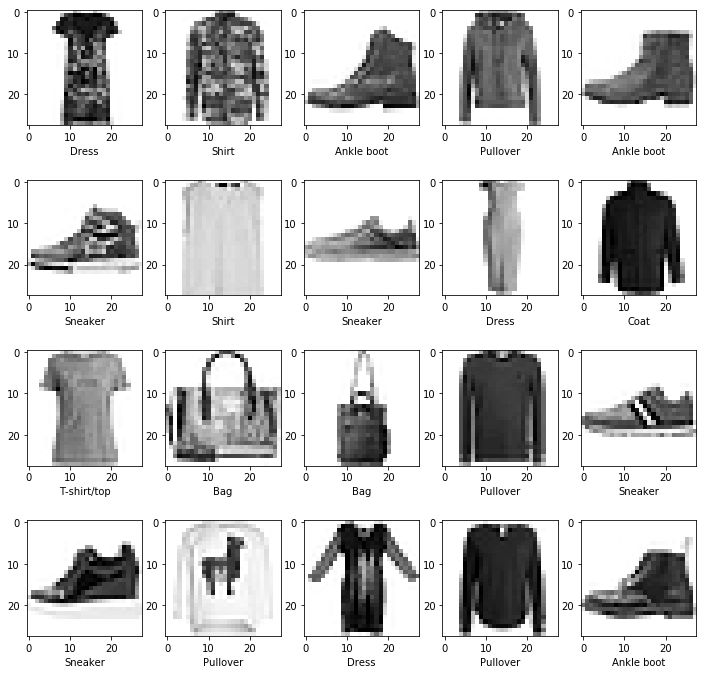

In [24]:
plt.figure(figsize = (12, 12))
index = 1

for image, label in train_dataset.take(20):
  image = tf.reshape(image, (28, 28))
  plt.subplot(4, 5, index)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(classes[label])
  index += 1

From the view point of a human, the images are quite clear. I'm able to distinguish and see what each of the images actually are. None of the images have a background to them. It appears that all images were taken on a white background. While this would be relatively easy, in real life, such objects would be colored and mixed with other items and different backgrounds. This would make the task more challenging and interesting.

## Processing the data

For working with deep learning models, it's always a good practice to normalize the dataset. Thus, I'll convert each pixel value from the range of [0, 255] to [0, 1]. On applying a `map`, we can apply a given method to all images in the dataset. Using this, I'll iterate over both the train and test dataset.

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)